# Import the standar library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the Data

The source come from 'Our World in Data'

In [42]:
data=pd.read_csv(r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv')
data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN


Since our targets are deaths and cases field from Indonesia, we make two independent data frames based on the target along with the date field for time series where location is 'Indonesia'.

In [43]:

dfDeaths=data[data['location']=='Indonesia'][['date','new_deaths']]
dfCases=data[data['location']=='Indonesia'][['date','new_cases']]


In [ ]:
dfDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 89102 to 90036
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        935 non-null    object 
 1   new_deaths  926 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.9+ KB


In [ ]:
dfCases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 89102 to 90036
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       935 non-null    object 
 1   new_cases  935 non-null    float64
dtypes: float64(1), object(1)
memory usage: 21.9+ KB


change the format for each column.

In [44]:
dfDeaths['date']=pd.to_datetime(dfDeaths['date'])
dfDeaths['new_deaths']=dfDeaths['new_deaths'].astype('Int64')

dfCases['date']=pd.to_datetime(dfCases['date'])
dfCases['new_cases']=dfCases['new_cases'].astype('Int64')



In [ ]:
dfDeaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 89102 to 90036
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        935 non-null    datetime64[ns]
 1   new_deaths  926 non-null    Int64         
dtypes: Int64(1), datetime64[ns](1)
memory usage: 22.8 KB


In [ ]:
dfCases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 89102 to 90036
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       935 non-null    datetime64[ns]
 1   new_cases  935 non-null    Int64         
dtypes: Int64(1), datetime64[ns](1)
memory usage: 22.8 KB


Set column date become an index

In [45]:
dfDeaths.set_index('date', inplace=True)
dfCases.set_index('date',inplace=True)

Dataset info

In [ ]:
dfDeaths.head()

,new_deaths
date,
2020-03-02,<NA>
2020-03-03,<NA>
2020-03-04,<NA>
2020-03-05,<NA>
2020-03-06,<NA>


In [ ]:
dfDeaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 935 entries, 2020-03-02 to 2022-09-22
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   new_deaths  926 non-null    Int64
dtypes: Int64(1)
memory usage: 15.5 KB


In [ ]:
dfDeaths.describe()

,new_deaths
count,926.000000
mean,170.589633
std,314.929343
min,0.000000
25%,17.000000
50%,78.000000
75%,172.750000
max,2069.000000


In [ ]:
dfCases.head()

,new_cases
date,
2020-03-02,2
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,2


In [ ]:
dfCases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 935 entries, 2020-03-02 to 2022-09-22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   new_cases  935 non-null    Int64
dtypes: Int64(1)
memory usage: 15.5 KB


In [ ]:
dfCases.describe()

,new_cases
count,935.000000
mean,6863.625668
std,11000.070717
min,0.000000
25%,691.000000
50%,3509.000000
75%,6382.000000
max,64718.000000


# Cleaning the data

Drop na or null values

In [46]:
dfDeaths.dropna(inplace=True)
dfCases.dropna(inplace=True)

Check duplicate value for index and drop it.

In [ ]:
dfDeaths[dfDeaths.index.duplicated]

,new_deaths
date,


In [ ]:
dfCases[dfCases.index.duplicated]

,new_cases
date,


Check the existence of negative values.

In [ ]:
dfDeaths[dfDeaths['new_deaths']<0]

,new_deaths
date,


In [ ]:
dfCases[dfCases['new_cases']<0]

,new_cases
date,


# Time Series Analysis.

## Linear Regression With Time Series  

For this project, we use two kinds of features unique to time series: **time-step** features and **lag** features. For time-step future, we use **time dummy**, which counts of time steps in the series from beginning to end.

In [8]:
dfDeaths['Time']=np.arange(len(dfDeaths.index))
dfDeaths.head()

,new_deaths,Time
date,,
2020-03-11,1,0
2020-03-12,0,1
2020-03-13,3,2
2020-03-14,1,3
2020-03-15,0,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time plot of New Deaths')

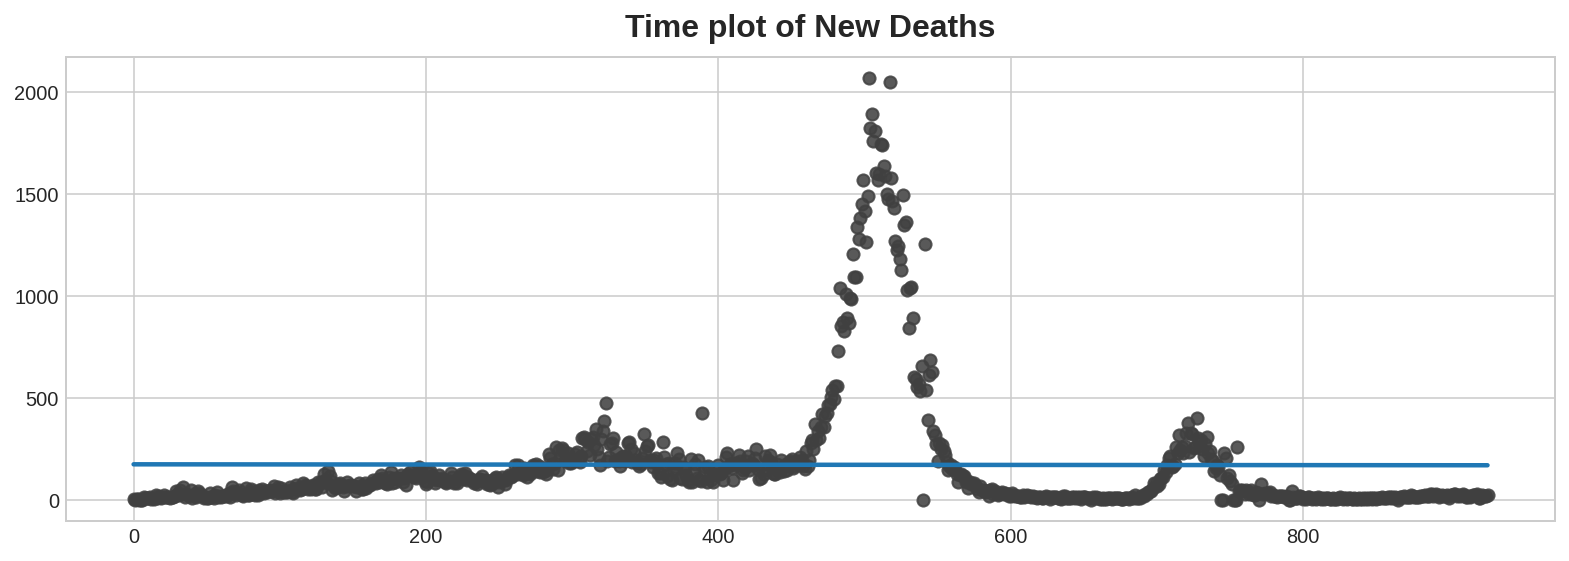

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format='retina'

fig, ax= plt.subplots()
x=np.array(dfDeaths['Time'].values)
y=np.array(dfDeaths['new_deaths'].values)
ax.scatter(x, y,  color='0.75')
ax=sns.regplot(x, y,ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of New Deaths')





In [ ]:
dfCases['Time']=np.arange(len(dfCases.index))
dfCases.head()

,new_cases,Time
date,,
2020-03-02,2,0
2020-03-03,0,1
2020-03-04,0,2
2020-03-05,0,3
2020-03-06,2,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time plot of New Cases')

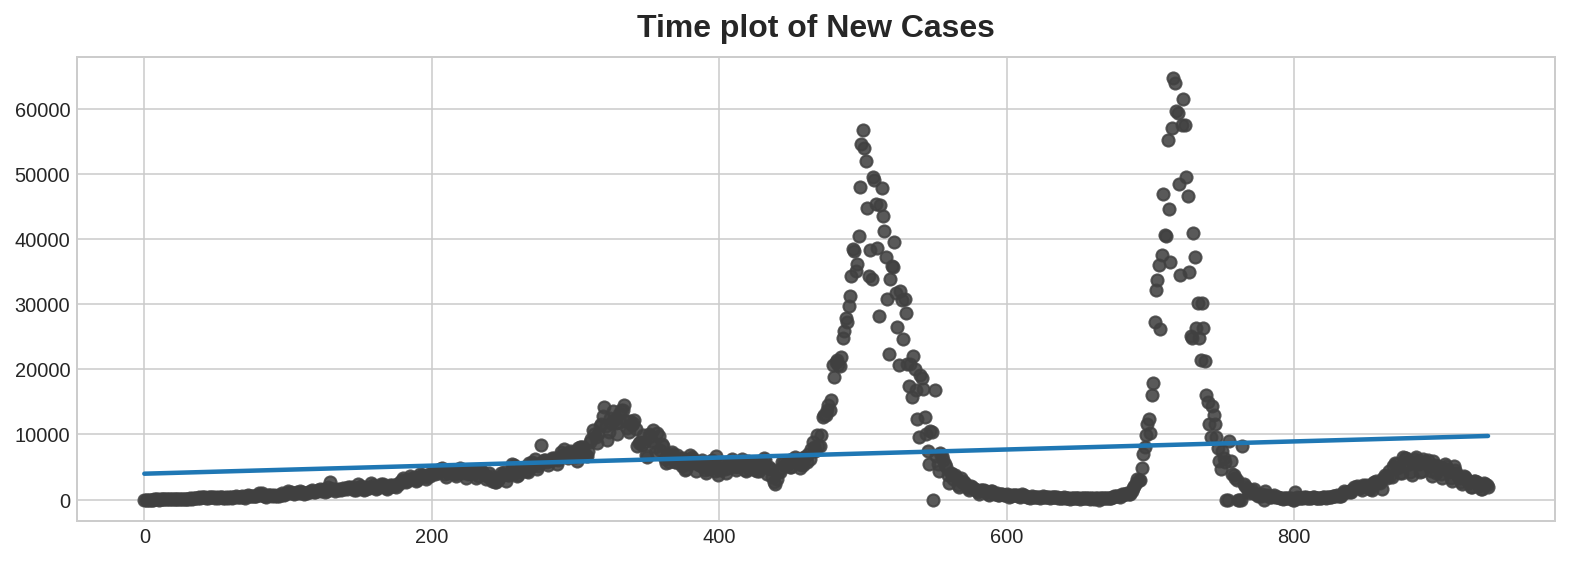

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format='retina'

fig, ax= plt.subplots()
x=np.array(dfCases['Time'].values)
y=np.array(dfCases['new_cases'].values)
ax.scatter(x, y,  color='0.75')
ax=sns.regplot(x, y,ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of New Cases')



By looking the graph, time dummy and the target don't have linear relations. Next we use another feature, which is lag feature. To make a lag feature we shift the observations of the target series so target series so they appear to have occured later in time. 

In [ ]:
dfDeaths['Lag_1']=dfDeaths['new_deaths'].shift(1)
dfDeaths.fillna(0, inplace=True)
dfDeaths.head()

,new_deaths,Time,Lag_1
date,,,
2020-03-11,1,0,0
2020-03-12,0,1,1
2020-03-13,3,2,0
2020-03-14,1,3,3
2020-03-15,0,4,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lag Plot of New Deaths')

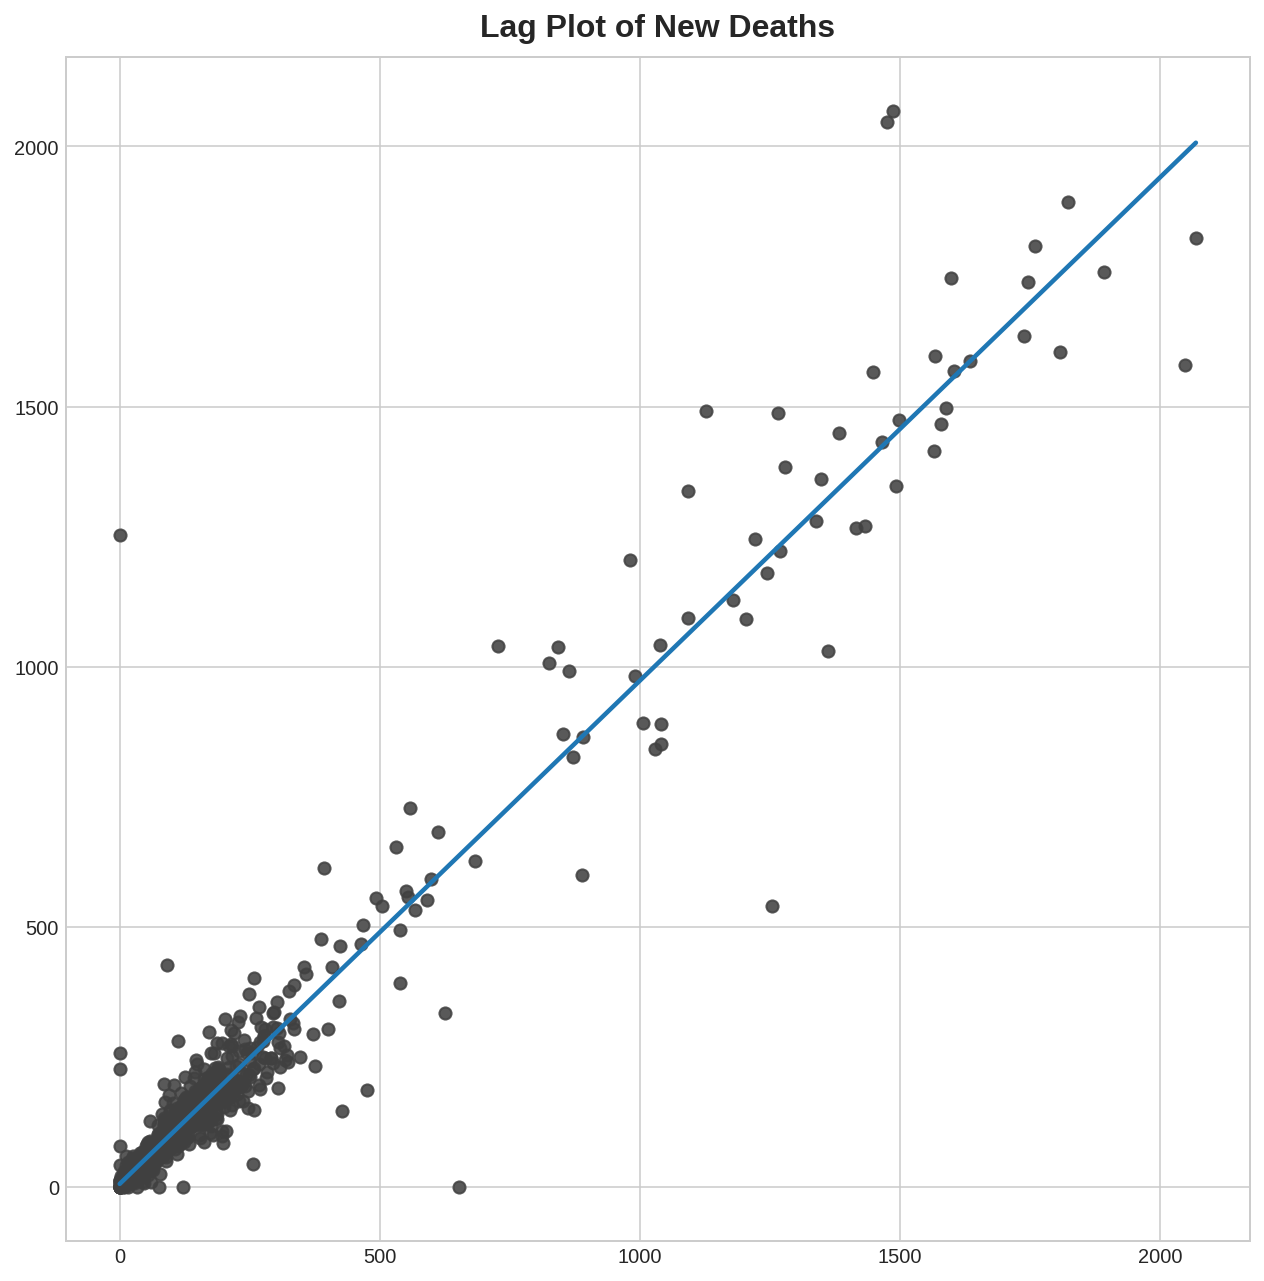

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(16,9),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format='retina'

fig, ax= plt.subplots()
x=np.array(dfDeaths['Lag_1'].values)
y=np.array(dfDeaths['new_deaths'].values)
X=x.astype('float64')
Y=y.astype('float64')
ax.scatter(x, y,  color='0.75')
ax=sns.regplot(X,Y,ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of New Deaths')


In [ ]:
dfCases['Lag_1']=dfCases['new_cases'].shift(1)
dfCases.fillna(0, inplace=True)
dfCases.head()


,new_cases,Lag_1
date,,
2020-03-02,2,0
2020-03-03,0,2
2020-03-04,0,0
2020-03-05,0,0
2020-03-06,2,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lag Plot of New Cases')

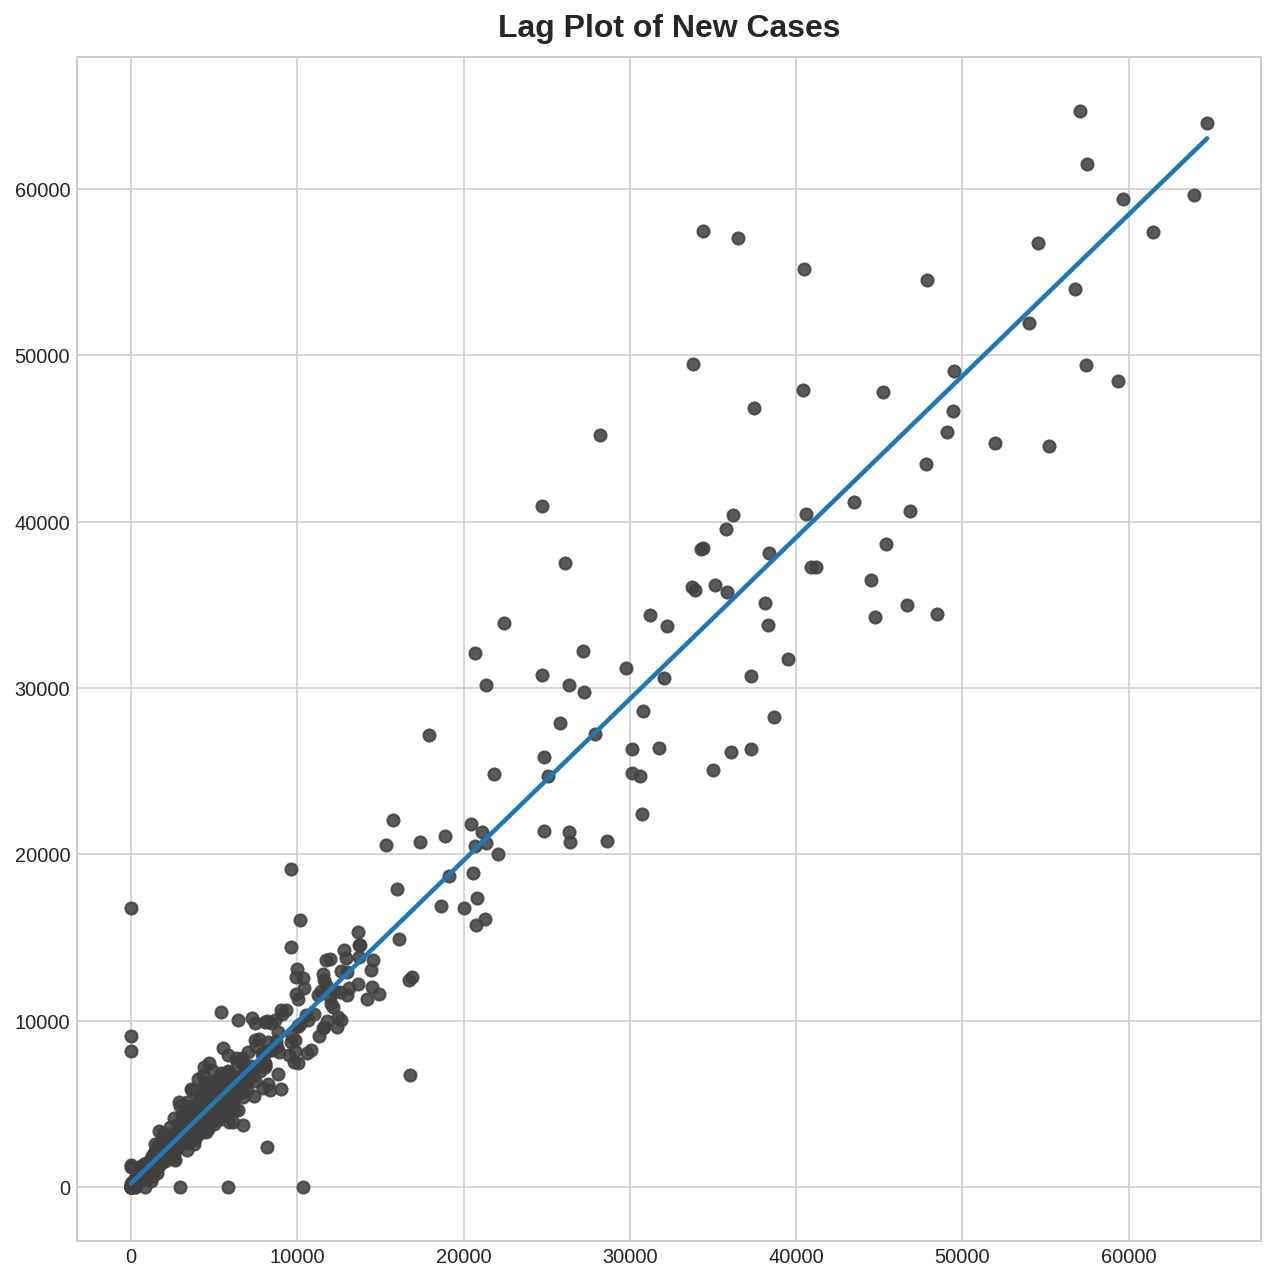

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure',
    autolayout=True,
    figsize=(16,9),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10
)
%config InlineBackend.figure_format='retina'

fig, ax= plt.subplots()
x=np.array(dfCases['Lag_1'].values)
y=np.array(dfCases['new_cases'].values)
X=x.astype('float64')
Y=y.astype('float64')
ax.scatter(x, y,  color='0.75')
ax=sns.regplot(X,Y,ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of New Cases')

From the picture above, we know that lag feature and our target have linear relationship.

# Trend

The **trend** component of a time series represents a persistent, long term change in the mean of the series. Let's make a moving average plot to see what kind of trend series has. Since this series has daily observations, let's choose a window of 365 day to smooth over any short-term changes within the year.

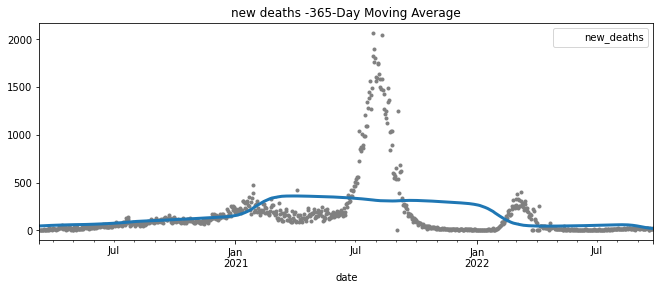

In [ ]:
movingAverageDeaths=dfDeaths.rolling(
    window=365, #365-day window
    center=True, #puts the average at the center of the window
    min_periods=183 # choose about half the window size
).mean() #compute the mean


ax=dfDeaths.plot(y='new_deaths', style='.', color='0.5',figsize=(11,4))
movingAverageDeaths.plot(
    ax=ax, y='new_deaths',linewidth=3, title='new deaths '
    '-365-Day Moving Average', legend=False 
)

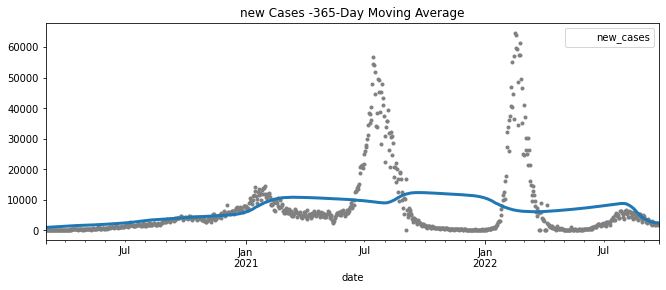

In [ ]:
movingAverageCases=dfCases.rolling(
    window=365, #365-day window
    center=True, #puts the average at the center of the window
    min_periods=183 # choose about half the window size
).mean() #compute the mean


ax=dfCases.plot(y='new_cases', style='.', color='0.5',figsize=(11,4))
movingAverageCases.plot(
    ax=ax, y='new_cases',linewidth=3, title='new Cases '
    '-365-Day Moving Average', legend=False 
)

It can be seen that this time series plot is **non-stationary** since the means in this time series plot  is **not constant**. In linear regression section, we know that time dummy don't have linear relation with our target. For this section, we want to use a function from **stastmodel** library called **DeterministicProceess** to engineered our time dummy in Pandas directly. By doing this, we could use **order** argument to polynomial order.

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess
dpDeaths=DeterministicProcess(
    index=dfDeaths.index, #dates from the training data
    constant=True,  #dummy feature for the bias (y_intercept)
    order=1, #the time dummy (trend) 2 with include both linear and and quadratic terms
    drop=True, #drop terms if necessary to avoid collinearity
)
# in sample creates feature for the dates given in the index argument

XDeaths=dpDeaths.in_sample()
XDeaths.head()

,const,trend
date,,
2020-03-11,1.0,1.0
2020-03-12,1.0,2.0
2020-03-13,1.0,3.0
2020-03-14,1.0,4.0
2020-03-15,1.0,5.0


In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess
dpCases=DeterministicProcess(
    index=dfCases.index, #dates from the training data
    constant=True,  #dummy feature for the bias (y_intercept)
    order=1, #the time dummy (trend) 2 with include both linear and and quadratic terms
    drop=True, #drop terms if necessary to avoid collinearity
)
# in sample creates feature for the dates given in the index argument

XCases=dpCases.in_sample()
XCases.head()

,const,trend
date,,
2020-03-02,1.0,1.0
2020-03-03,1.0,2.0
2020-03-04,1.0,3.0
2020-03-05,1.0,4.0
2020-03-06,1.0,5.0


Let's find the trend using **linear regression**

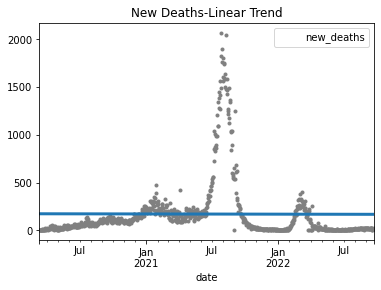

In [ ]:
from sklearn.linear_model import LinearRegression

yDeaths=dfDeaths['new_deaths'] #the target
# LinearRegression behave badly with duplicated features, so we need to 
# be sure to exclude it here
model=LinearRegression(fit_intercept=False)
model.fit(XDeaths,yDeaths)

y_pred=pd.Series(model.predict(XDeaths), index=XDeaths.index)

ax=dfDeaths.plot(y='new_deaths', style='.', color='0.5',
                 title='New Deaths-Linear Trend')
y_pred.plot(ax=ax,y='new_deaths', linewidth=3, label="Trend")
 

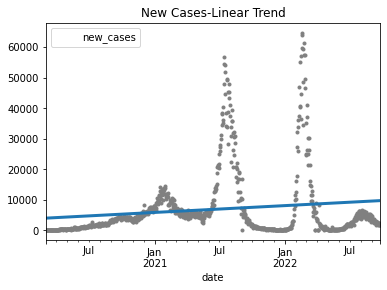

In [ ]:
from sklearn.linear_model import LinearRegression

yCases=dfCases['new_cases'] #the target
# LinearRegression behave badly with duplicated features, so we need to 
# be sure to exclude it here
model=LinearRegression(fit_intercept=False)
model.fit(XCases,yCases)

y_pred=pd.Series(model.predict(XCases), index=XCases.index)

ax=dfCases.plot(y='new_cases', style='.', color='0.5',
                 title='New Cases-Linear Trend', )
y_pred.plot(ax=ax,y='new_cases', linewidth=3, )

# Seasonality
From the previous section, we can see that the mean of the graph has a periodic change in some time interval. Seasonality is often driven by the cycles of the natural world over days and years or by conventions of social behavior surrounding dates and times. Just like we used a moving average plot to discover the trend in series, we can use a **seasonal plot** to discover seasonal pattern

In [17]:
from pathlib import Path
from warnings import simplefilter
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


Let's take a look at seasonal plots over a week and over a year. For this time, we use the deaths and cases data without any additation columns from trend section.

In [15]:
dfDeaths.head()

,new_deaths
date,
2020-03-11,1
2020-03-12,0
2020-03-13,3
2020-03-14,1
2020-03-15,0


In [ ]:
dfCases.head()

,new_cases
date,
2020-03-02,2
2020-03-03,0
2020-03-04,0
2020-03-05,0
2020-03-06,2


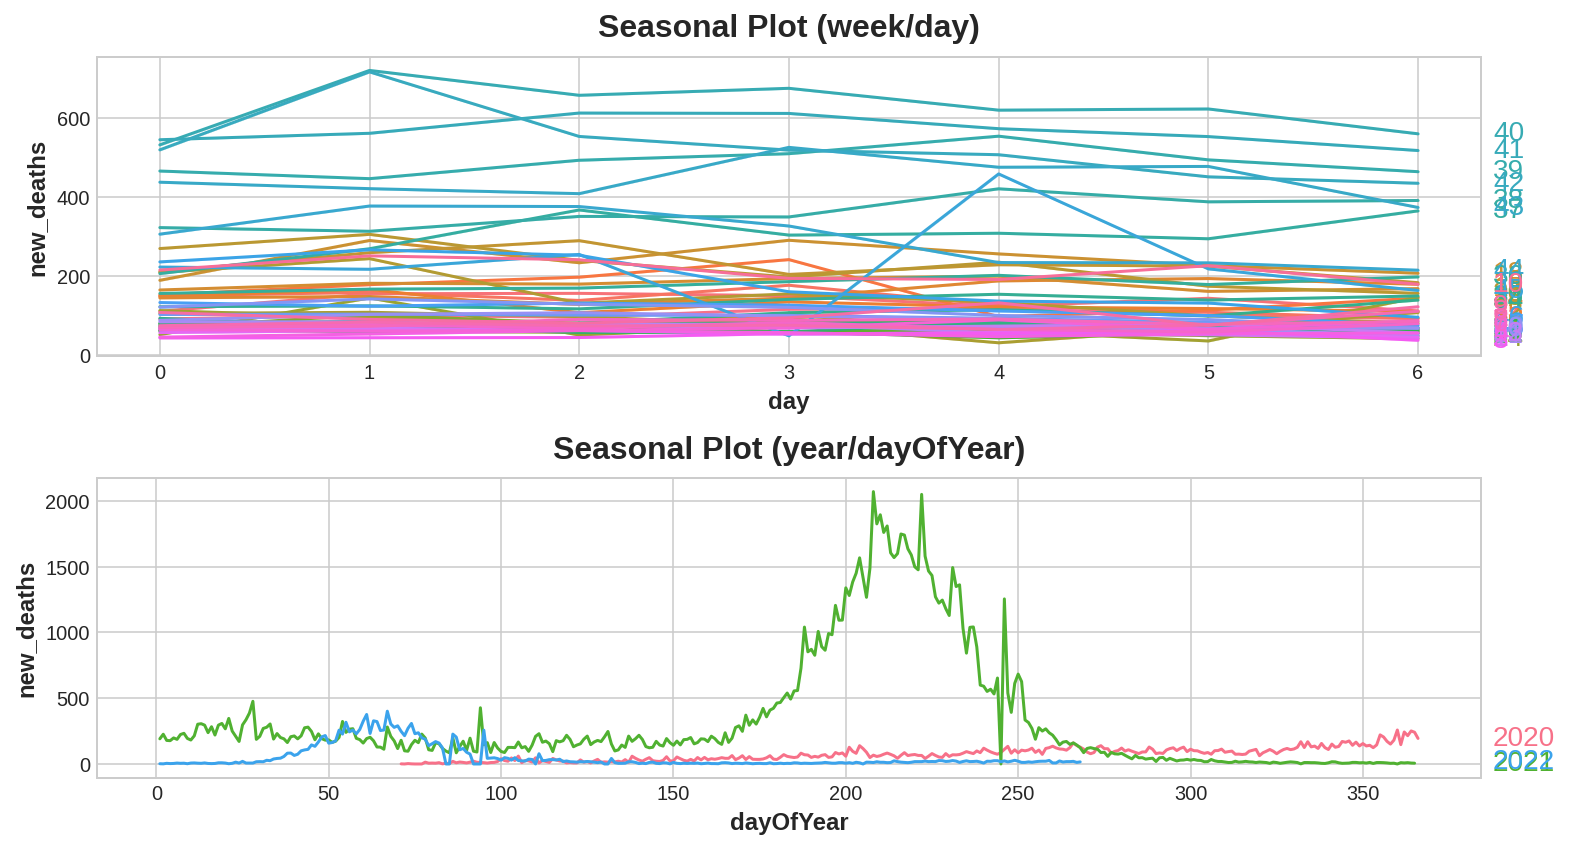

In [ ]:
XDeaths=dfDeaths.copy()

# days within a week
XDeaths['day']=XDeaths.index.dayofweek #the x-axis(freq)
XDeaths['week']=XDeaths.index.week #the seasonal period

#days within a year
XDeaths['dayOfYear']=XDeaths.index.dayofyear
XDeaths['year']=XDeaths.index.year

fig,(ax0,ax1)=plt.subplots(2,1, figsize=(11,6))
seasonal_plot(XDeaths, y='new_deaths', period='week', 
              freq='day', ax=ax0)
seasonal_plot(XDeaths, y='new_deaths', period='year',
              freq='dayOfYear', ax=ax1)




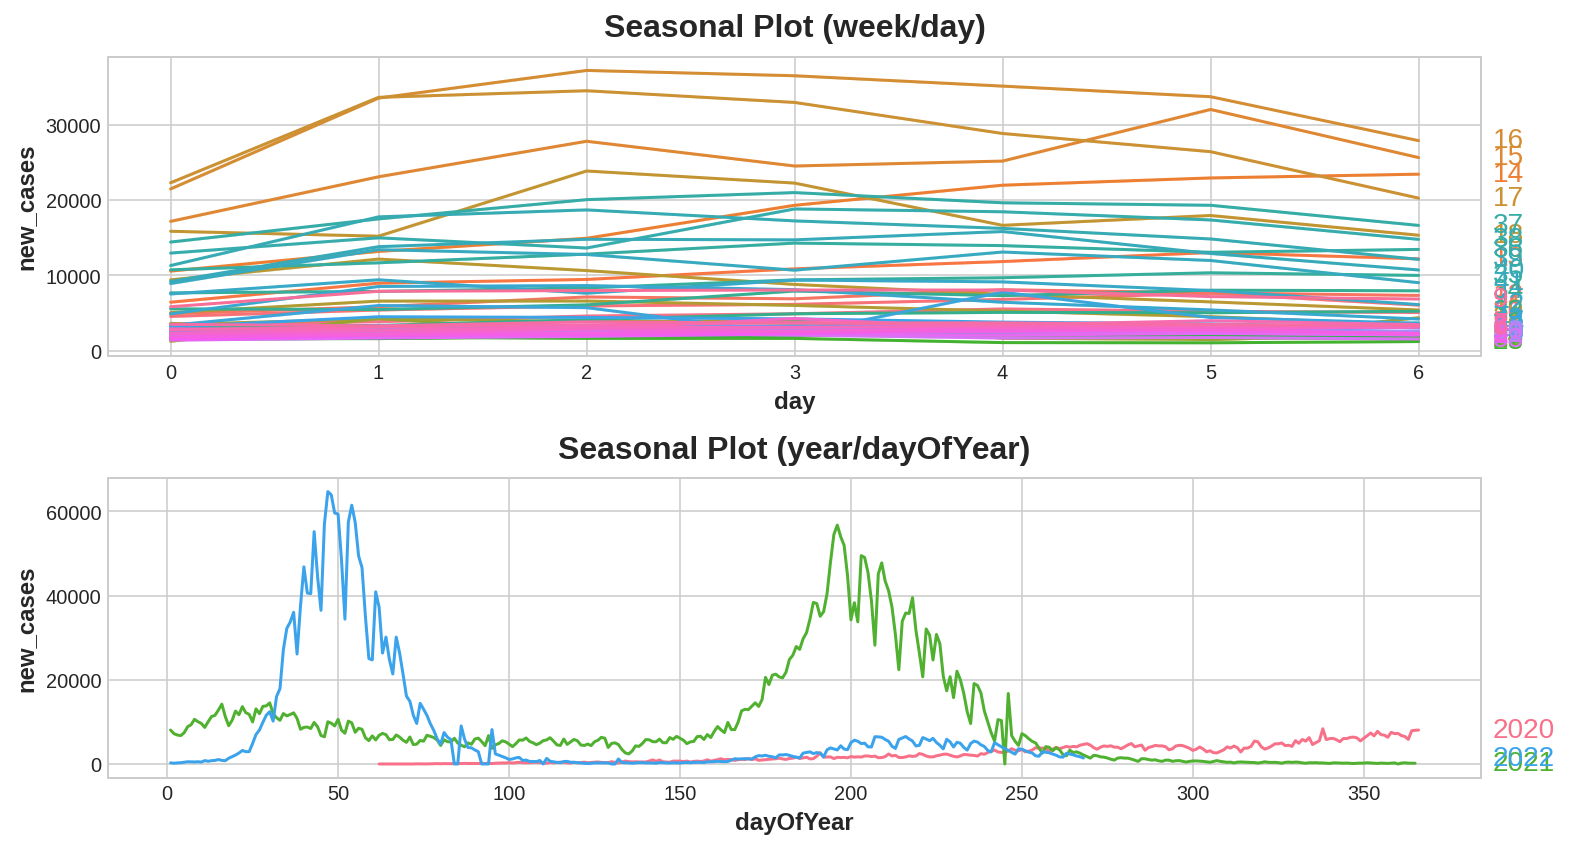

In [ ]:
XCases=dfCases.copy()

# days within a week
XCases['day']=XCases.index.dayofweek #the x-axis(freq)
XCases['week']=XCases.index.week #the seasonal period

#days within a year
XCases['dayOfYear']=XCases.index.dayofyear
XCases['year']=XCases.index.year

fig,(ax0,ax1)=plt.subplots(2,1, figsize=(11,6))
seasonal_plot(XCases, y='new_cases', period='week', 
              freq='day', ax=ax0)
seasonal_plot(XCases, y='new_cases', period='year',
              freq='dayOfYear', ax=ax1)


Now let's look at the periodogram

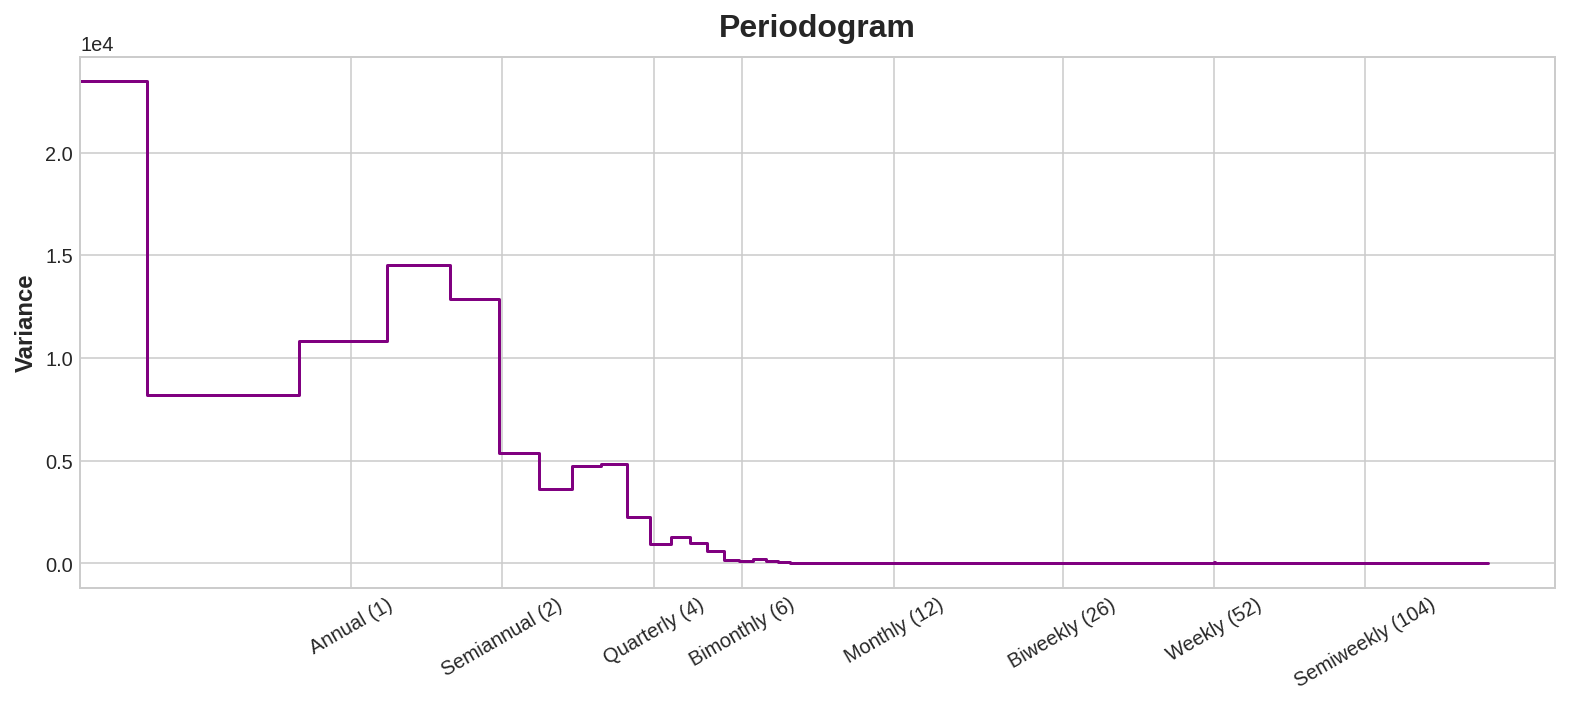

In [ ]:
data=dfDeaths['new_deaths'].astype('float')
plot_periodogram(data)

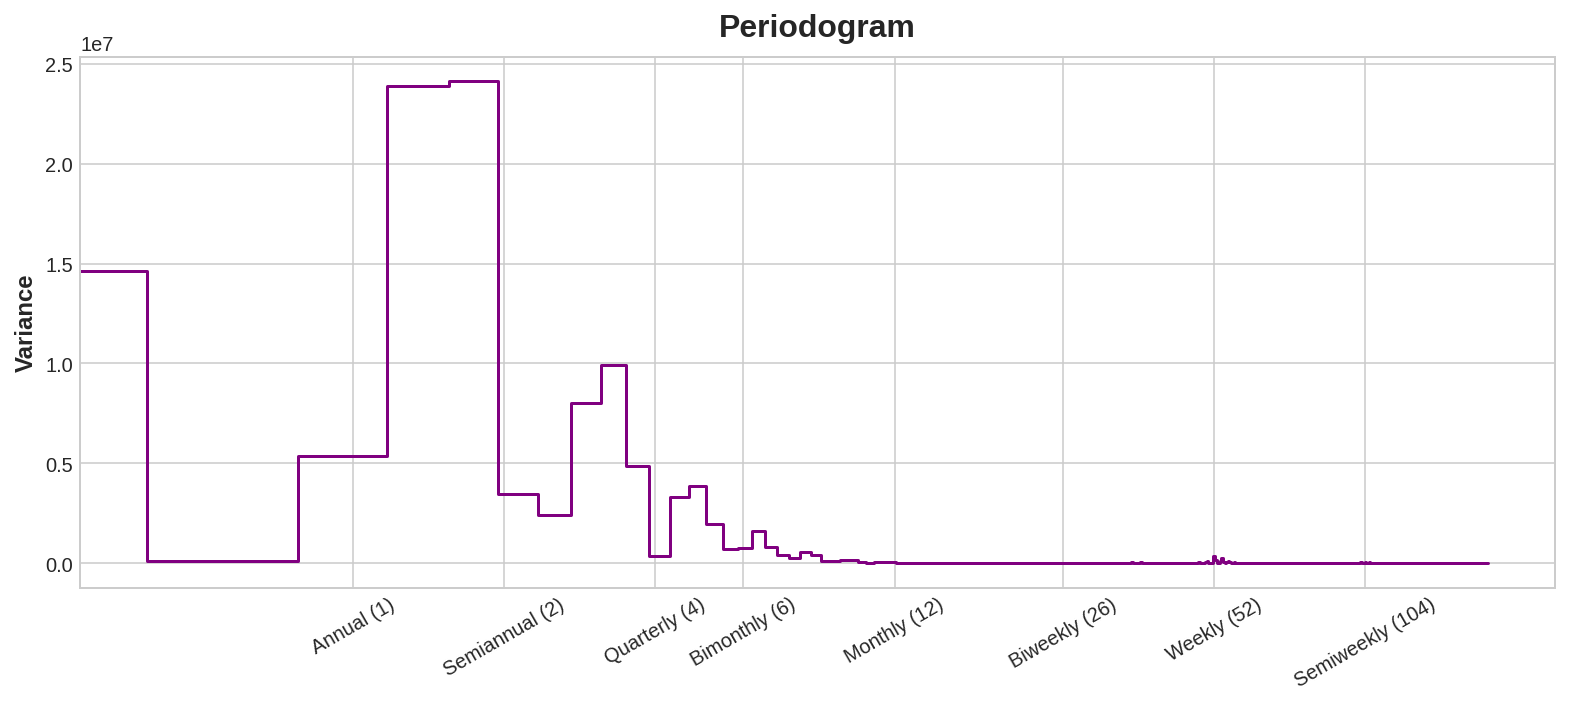

In [ ]:
data=dfCases['new_cases'].astype('float')
plot_periodogram(data)

The periodogram agress with the seasonal plot above: a strong weekly season and weaker annual season.

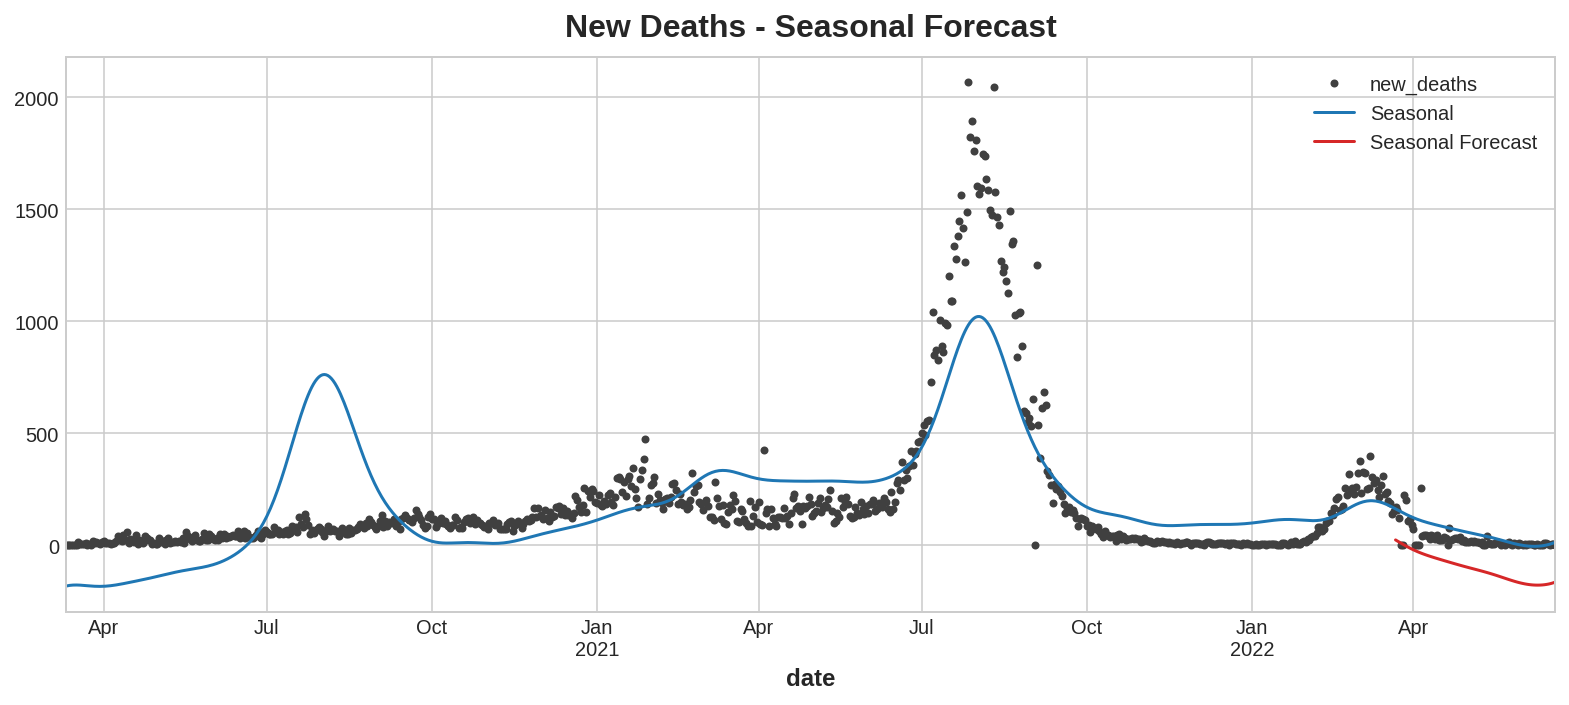

In [74]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10 )  # 10 sin/cos pairs for "A"nnual seasonality

df=dfDeaths[:'2022-06-19']
dpDeaths = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=2,                     # trend (order 1 means linear)
    seasonal=False,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dpDeaths.in_sample()  # create features for dates in tunnel.index

y = df["new_deaths"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dpDeaths.out_of_sample(steps=90, forecast_index=df.index[-90:])
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="New Deaths - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

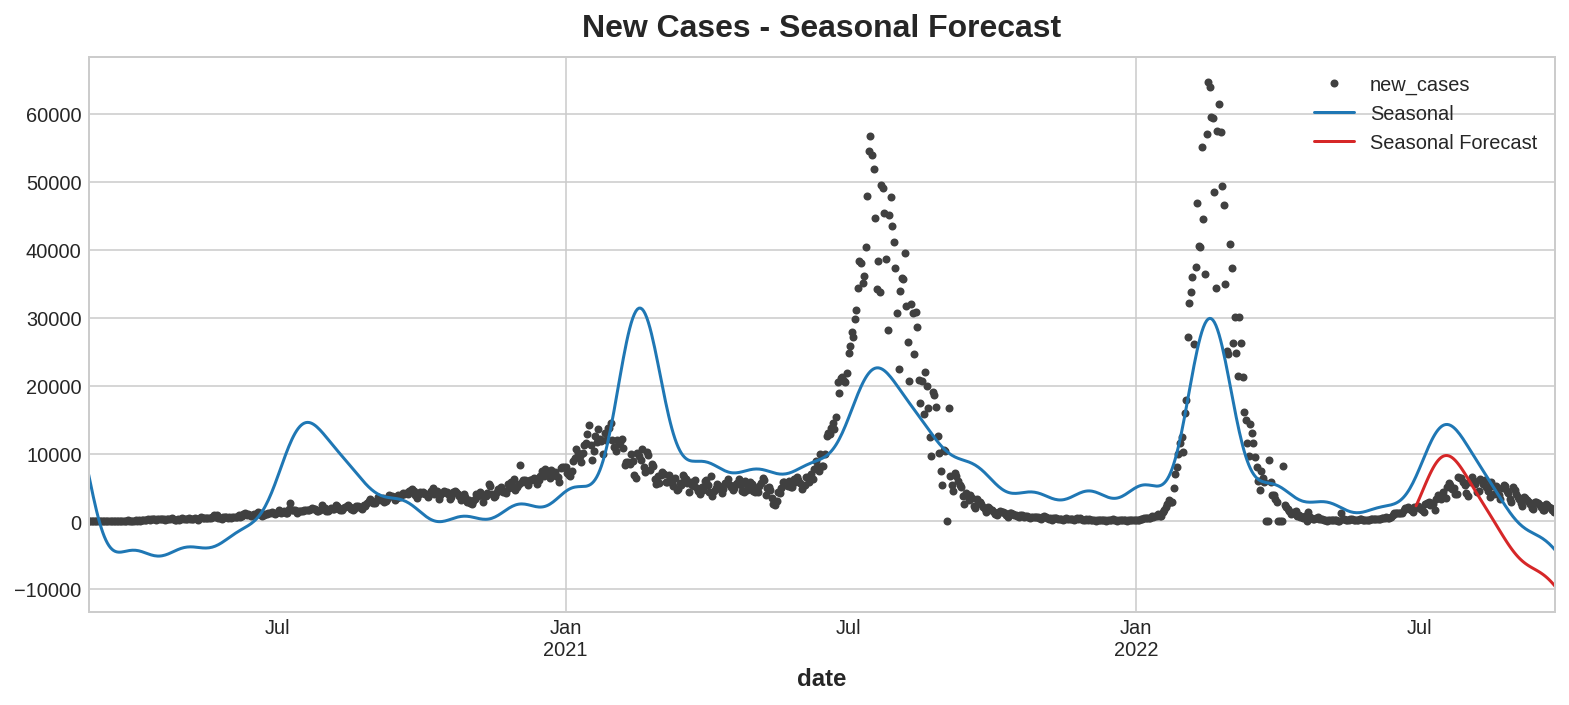

In [75]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=10 )  # 10 sin/cos pairs for "A"nnual seasonality

df=dfCases
dpDeaths = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=2,                     # trend (order 1 means linear)
    seasonal=False,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity
)

X = dpDeaths.in_sample()  # create features for dates in tunnel.index

y = df["new_cases"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dpDeaths.out_of_sample(steps=90, forecast_index=df.index[-90:])
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="New Cases - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

From the picture above we know using seasonality have better performance to predict our target than try using trend. But our performance still far from what we expected.